In [1]:
import pandas as pd
import numpy as np

C:\Users\rahul\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
file_path = "C:\\Users\\rahul\\OneDrive\\Desktop\\SBIN.NS (1).csv"
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
         Date       Open       High        Low      Close  Adj Close  \
0  2004-01-05  53.898628  57.016964  53.568394  56.700886  42.897266   
1  2004-01-06  56.799953  58.436962  55.865868  56.719753  42.911533   
2  2004-01-07  57.809521  57.809521  55.125206  56.290455  42.586750   
3  2004-01-08  56.799953  59.347462  56.799953  58.569057  44.310638   
4  2004-01-09  59.253109  61.423206  58.970051  60.390053  45.688313   

       Volume  
0  68132760.0  
1  84466581.0  
2  71533904.0  
3  44911270.0  
4  73303987.0  


In [4]:
# Get a summary of the dataset
print("\nDataset information:")
data.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5100 non-null   object 
 1   Open       5091 non-null   float64
 2   High       5091 non-null   float64
 3   Low        5091 non-null   float64
 4   Close      5091 non-null   float64
 5   Adj Close  5091 non-null   float64
 6   Volume     5091 non-null   float64
dtypes: float64(6), object(1)
memory usage: 279.0+ KB


In [5]:
print(data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [6]:
# Get a summary of the statistical data
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
              Open         High          Low        Close    Adj Close  \
count  5091.000000  5091.000000  5091.000000  5091.000000  5091.000000   
mean    259.404107   262.781202   255.606058   259.080835   238.031544   
std     160.901153   162.289706   159.286365   160.802900   161.905802   
min      38.401299    40.076046    36.797314    38.561695    29.173988   
25%     163.794998   166.467506   160.219918   163.457504   140.678871   
50%     230.899994   233.699997   227.610001   230.365005   202.508728   
75%     298.774994   303.149994   294.475006   298.402496   275.491349   
max     897.000000   912.000000   883.299988   905.650024   905.650024   

             Volume  
count  5.091000e+03  
mean   2.436879e+07  
std    1.799988e+07  
min    0.000000e+00  
25%    1.353107e+07  
50%    1.920273e+07  
75%    2.875753e+07  
max    2.626771e+08  


In [7]:
# Check for missing values in the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64


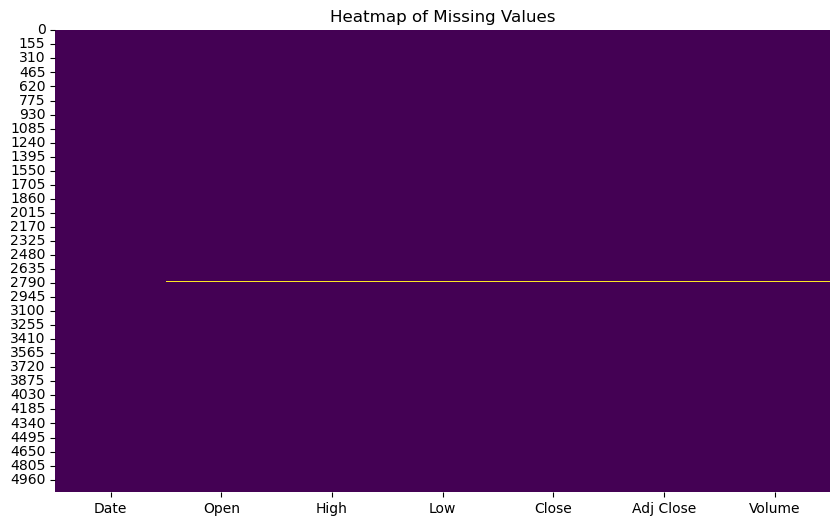

In [8]:
# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

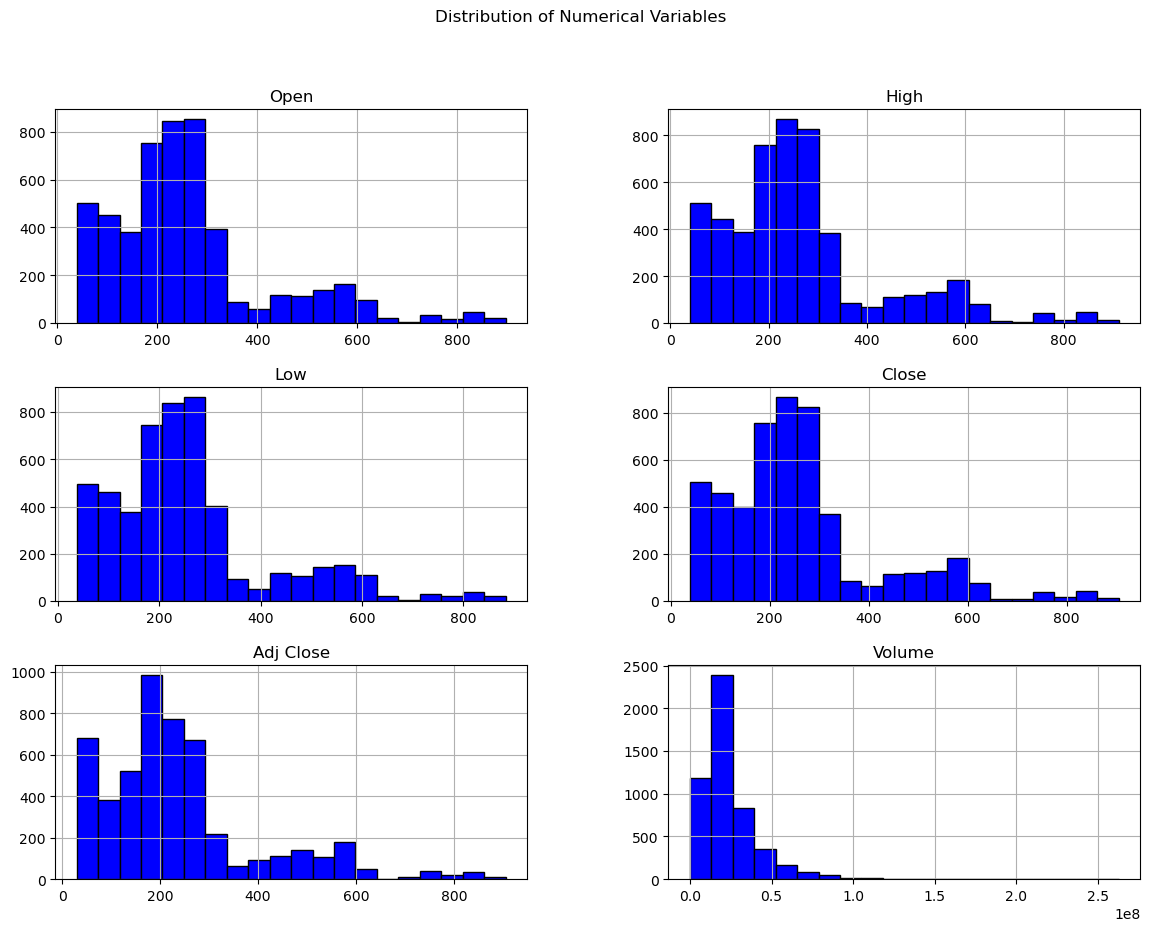

In [9]:
# Plot histograms for numerical variables
data.hist(figsize=(14, 10), bins=20, color='blue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables")
plt.show()

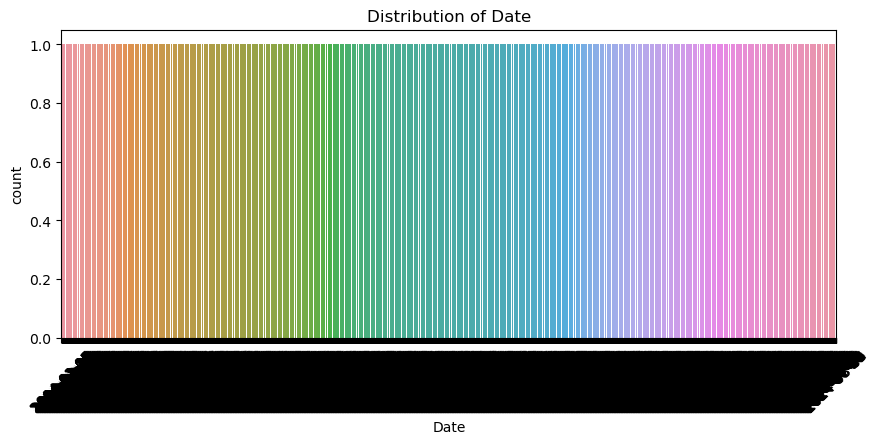

In [10]:
# Bar plots for categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=data[col])  # Specify 'x' or 'y' depending on your data
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


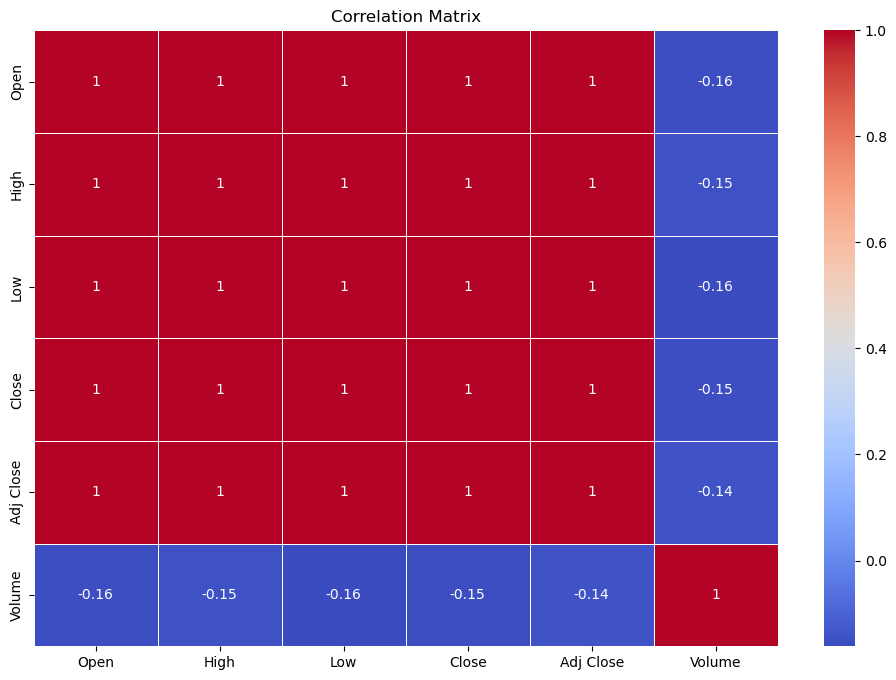

In [11]:
# Select only numeric columns for correlation matrix calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [12]:
# Convert the 'Date' column to datetime format with dayfirst=True
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')


# Set the date as the index
print(data[data['Date'].isna()])


# Display the first few rows to confirm the conversion
print("First few rows with Date as index:")
print(data.head())

     Date        Open        High         Low       Close   Adj Close  \
6     NaT   60.668388   61.517559   60.446663   60.946728   46.109474   
7     NaT   61.626064   64.055626   61.626064   63.447060   48.001102   
8     NaT   63.970715   65.093498   61.526993   62.498821   47.283718   
9     NaT   62.744137   62.744137   59.064404   59.932442   45.342106   
10    NaT   60.338158   62.687523   59.300285   61.956295   46.873264   
...   ...         ...         ...         ...         ...         ...   
5092  NaT  847.500000  850.750000  841.200012  848.500000  848.500000   
5093  NaT  844.650024  864.250000  844.000000  862.450012  862.450012   
5094  NaT  866.049988  889.099976  863.200012  871.599976  871.599976   
5095  NaT  874.700012  880.549988  869.000000  872.799988  872.799988   
5096  NaT  873.849976  874.950012  868.000000  872.400024  872.400024   

          Volume  
6     39462551.0  
7     45070684.0  
8     67331421.0  
9     55153768.0  
10    40350502.0  
...      

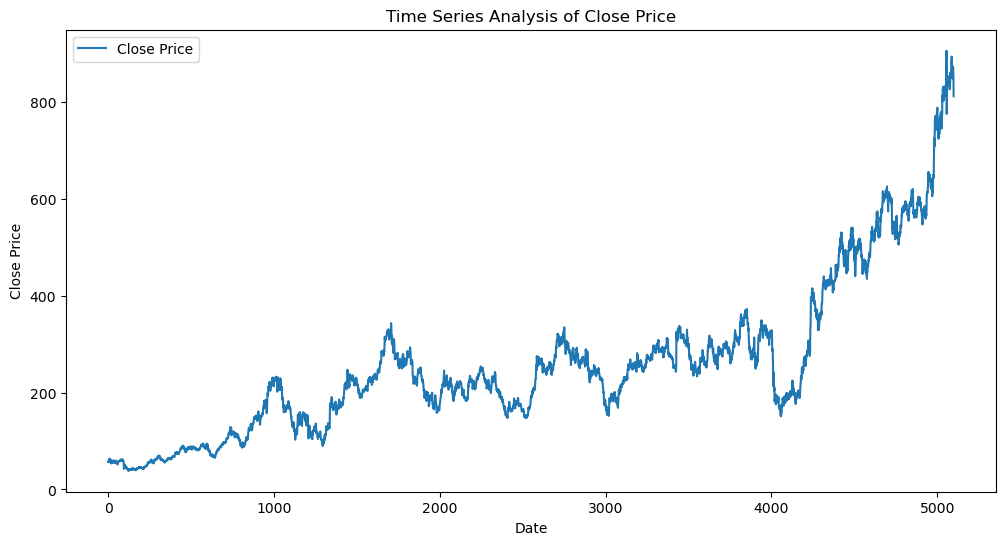

In [13]:
# Plot the time series data (for a specific column, e.g., 'Close')
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title("Time Series Analysis of Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

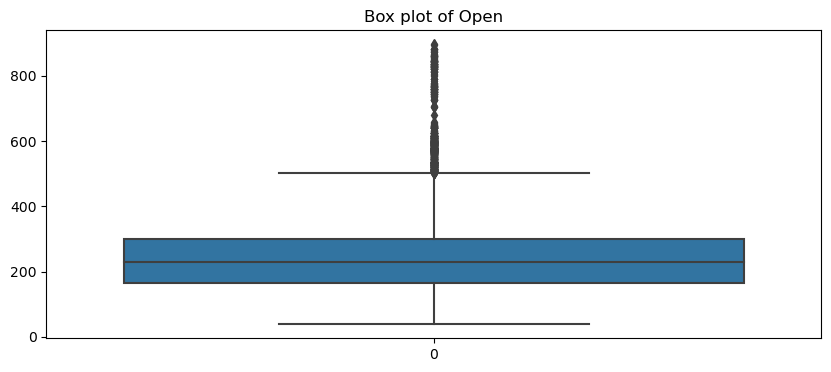

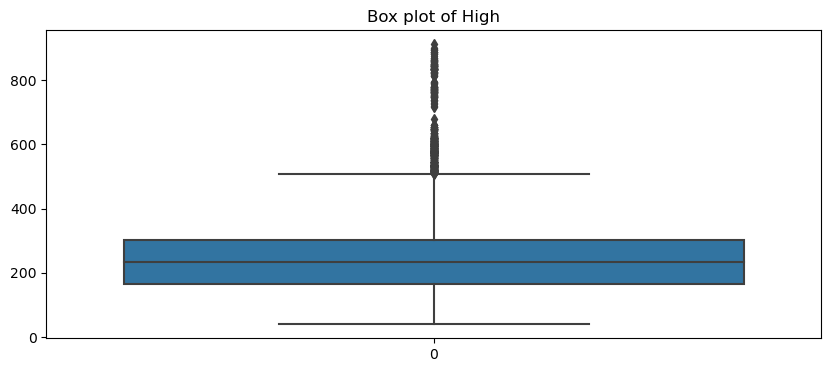

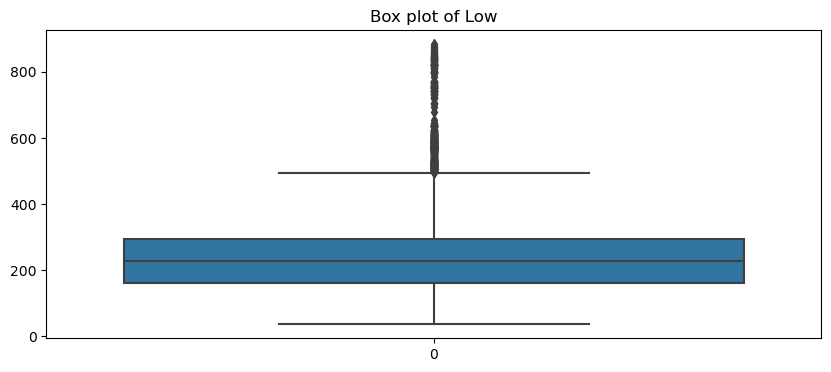

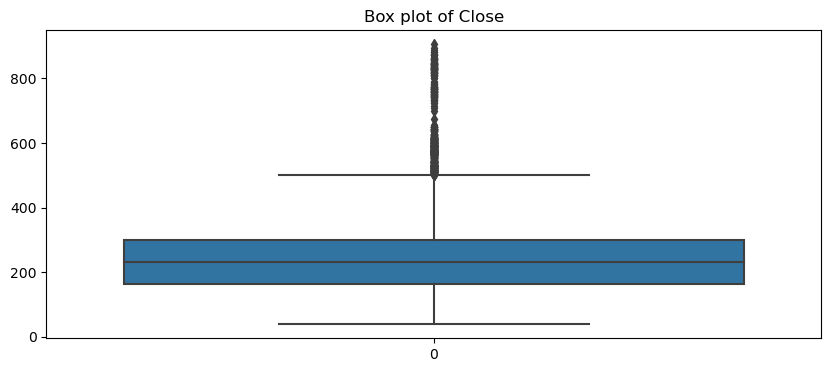

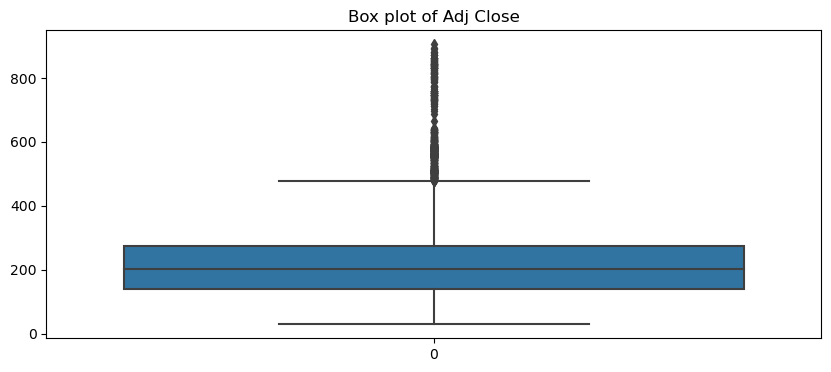

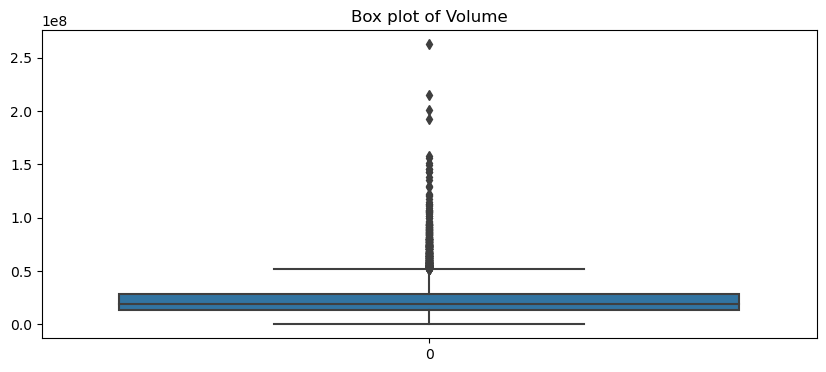

In [14]:
# Box plots to detect outliers in numerical variables
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data[col])
    plt.title(f"Box plot of {col}")
    plt.show()

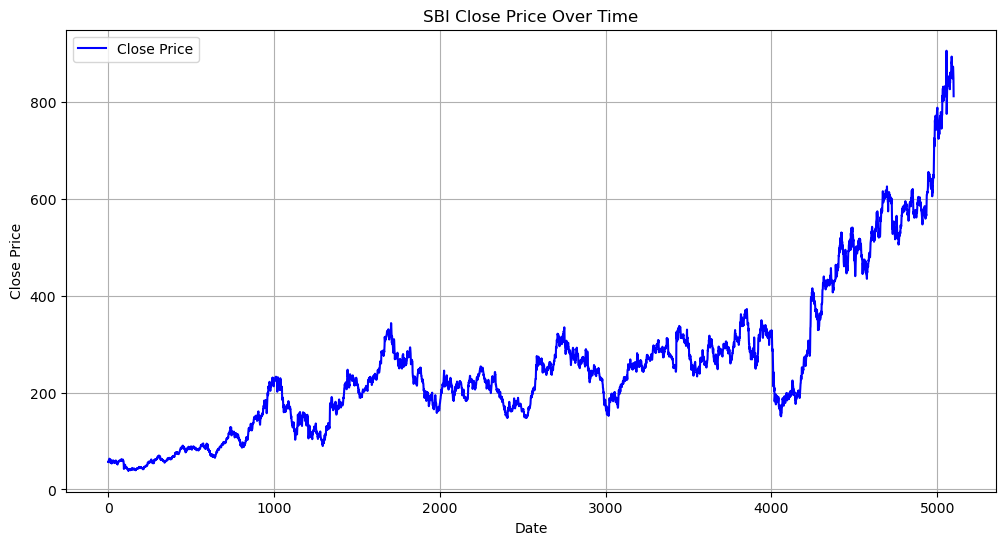

In [15]:
import matplotlib.pyplot as plt

# Line plot for 'Close' prices over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.title("SBI Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

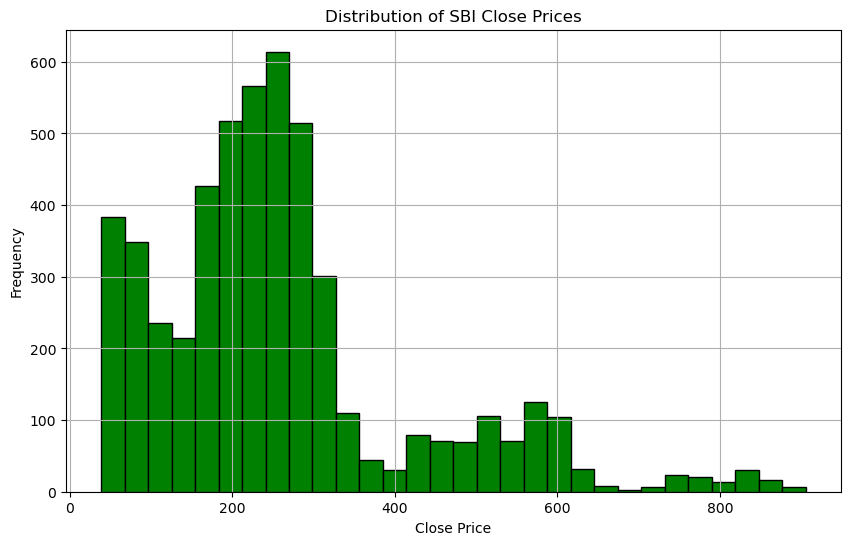

In [16]:
# Histogram for 'Close' prices
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=30, color='green', edgecolor='black')
plt.title("Distribution of SBI Close Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

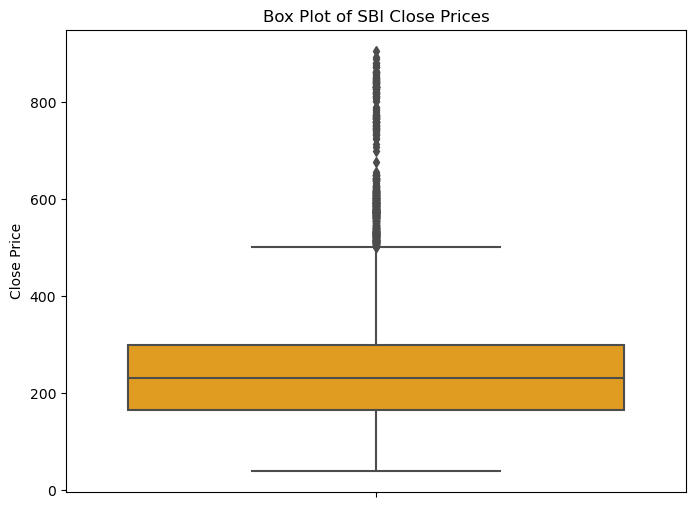

In [17]:
import seaborn as sns

# Box plot for 'Close' prices
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Close'], color='orange')
plt.title("Box Plot of SBI Close Prices")
plt.ylabel("Close Price")
plt.show()


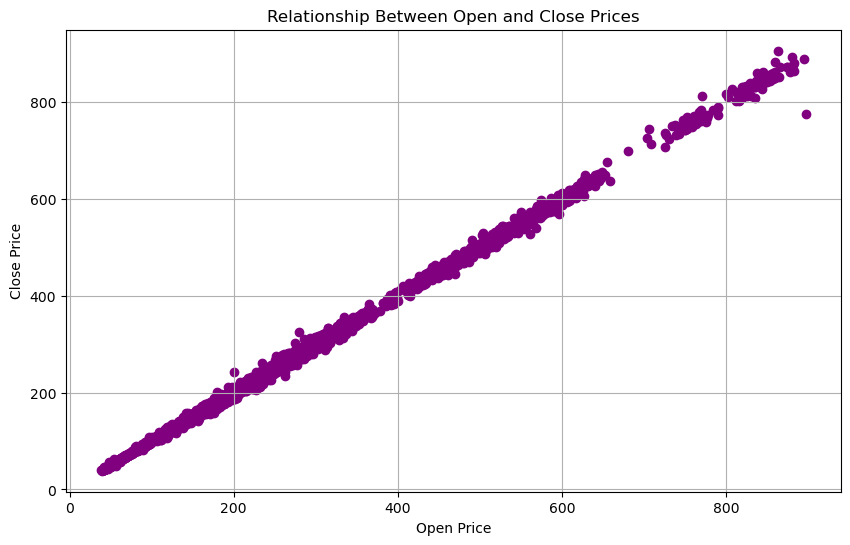

In [18]:
# Scatter plot between 'Open' and 'Close' prices
plt.figure(figsize=(10, 6))
plt.scatter(data['Open'], data['Close'], color='purple')
plt.title("Relationship Between Open and Close Prices")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

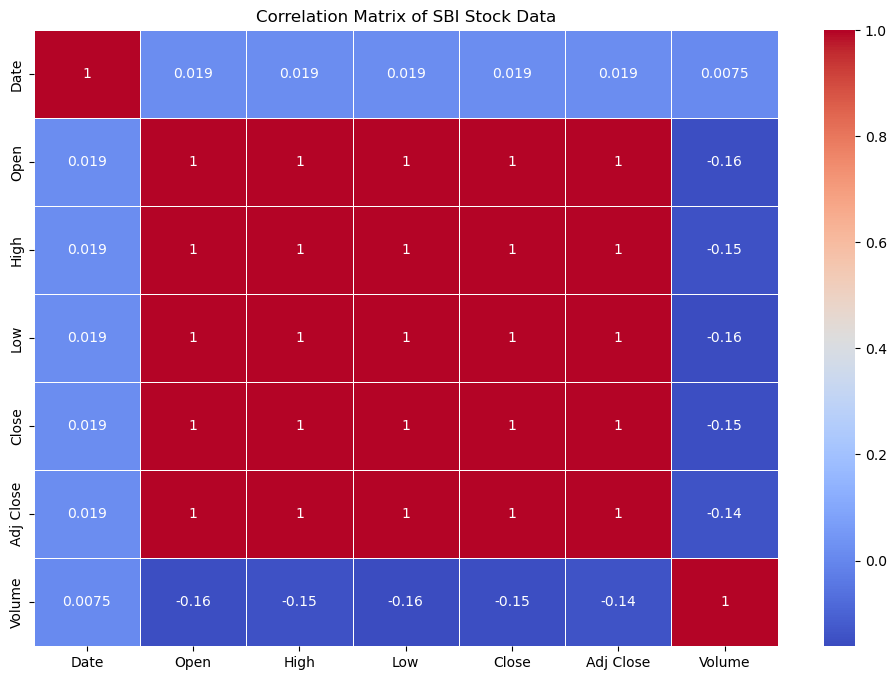

In [19]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of SBI Stock Data")
plt.show()

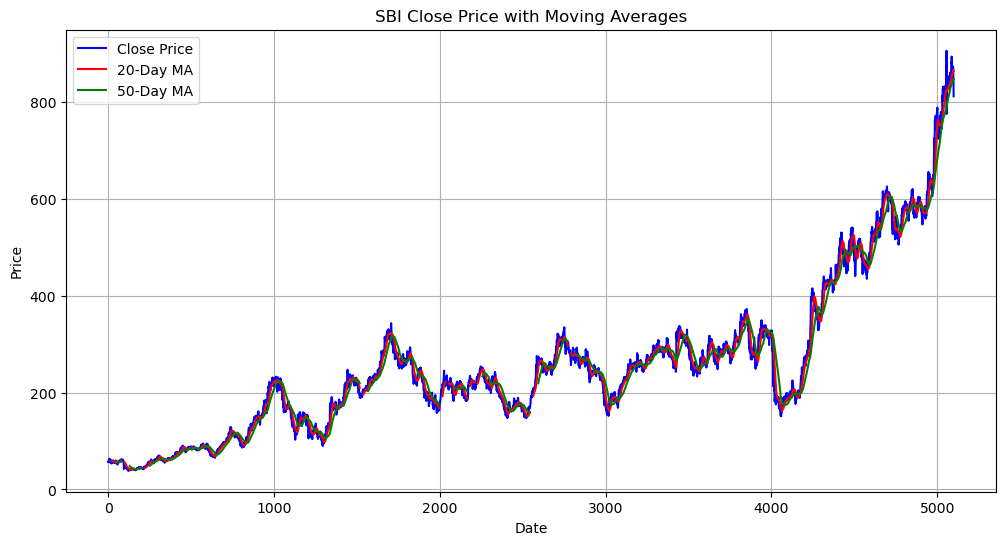

In [20]:
# Calculate moving averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Plot the Close Price with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.plot(data.index, data['MA20'], color='red', label='20-Day MA')
plt.plot(data.index, data['MA50'], color='green', label='50-Day MA')
plt.title("SBI Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\rahul\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


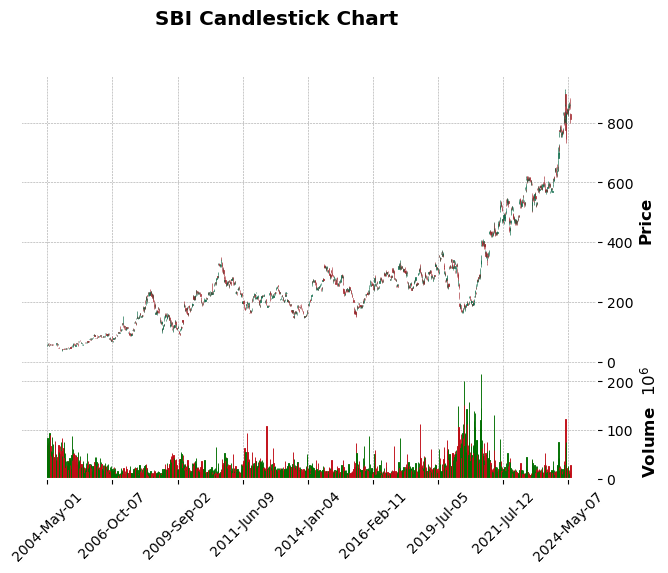

In [22]:
import pandas as pd
import mplfinance as mpf

# Assuming your data is already loaded in a DataFrame called 'data'

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop any rows where the date conversion failed
data.dropna(subset=['Date'], inplace=True)

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Check if the index is a DatetimeIndex
if not isinstance(data.index, pd.DatetimeIndex):
    raise TypeError("The index is not a DatetimeIndex!")

# Plot the candlestick chart
mpf.plot(data, type='candle', style='charles', title='SBI Candlestick Chart', ylabel='Price', volume=True)


C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

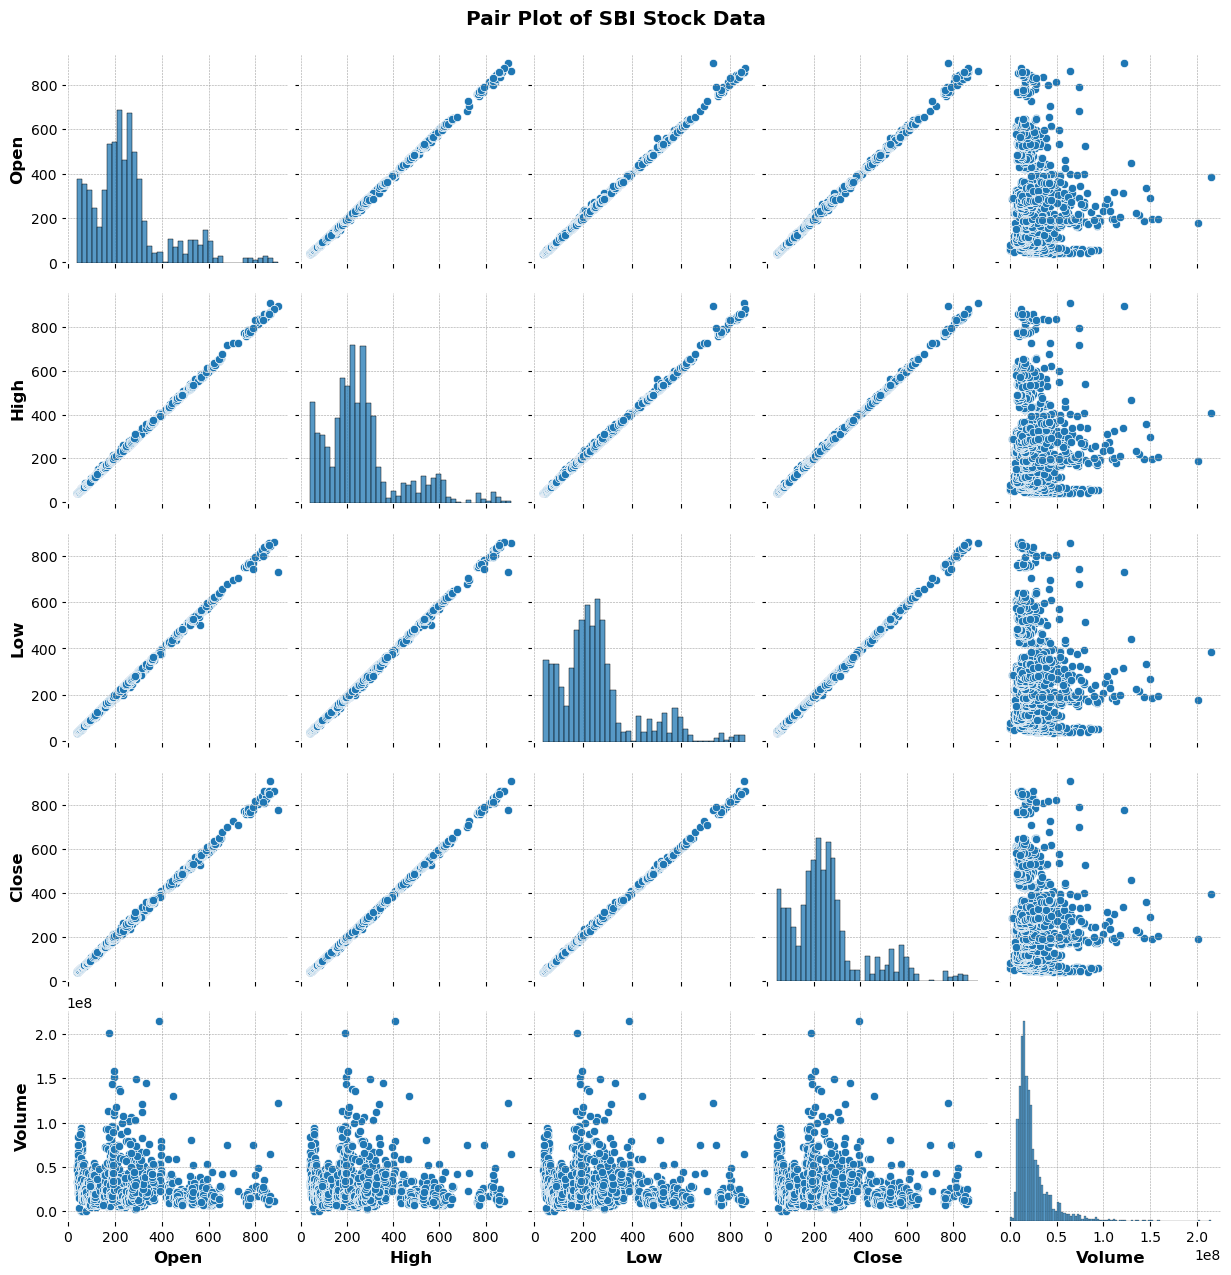

In [23]:
# Pair plot for selected columns
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.suptitle("Pair Plot of SBI Stock Data", y=1.02)
plt.show()

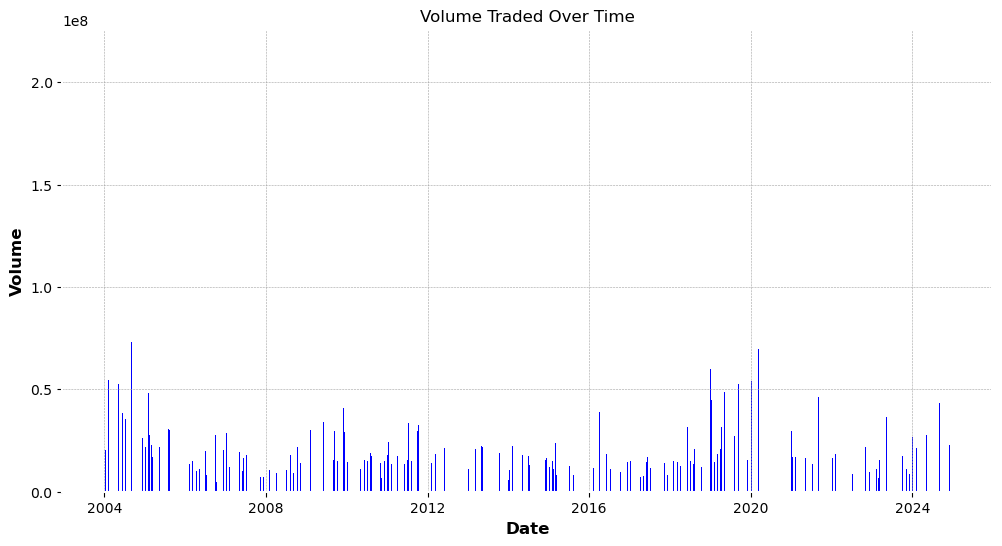

In [24]:
# Bar plot for volume traded over time
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Volume'], color='blue')
plt.title("Volume Traded Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

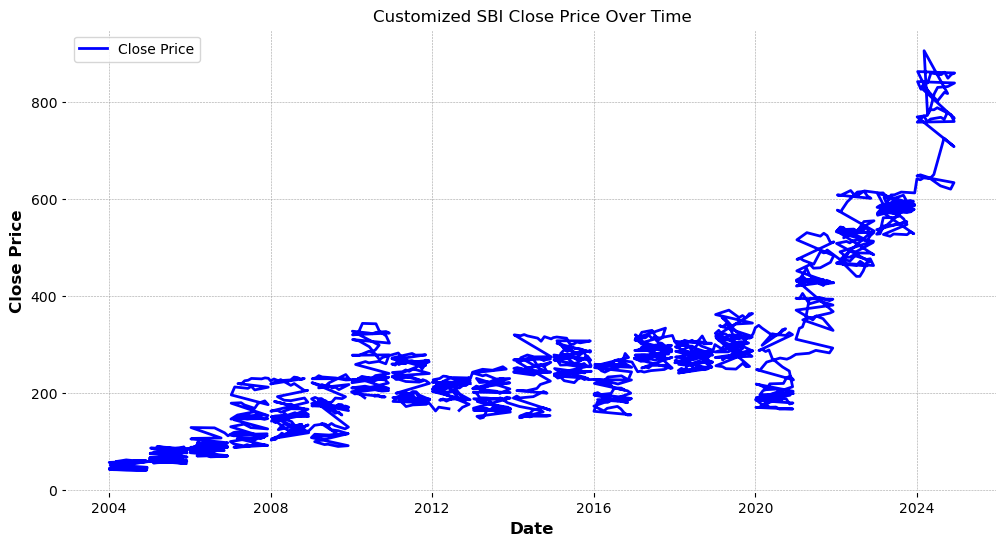

In [25]:
# Example customization with title, labels, and legend
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.title("Customized SBI Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

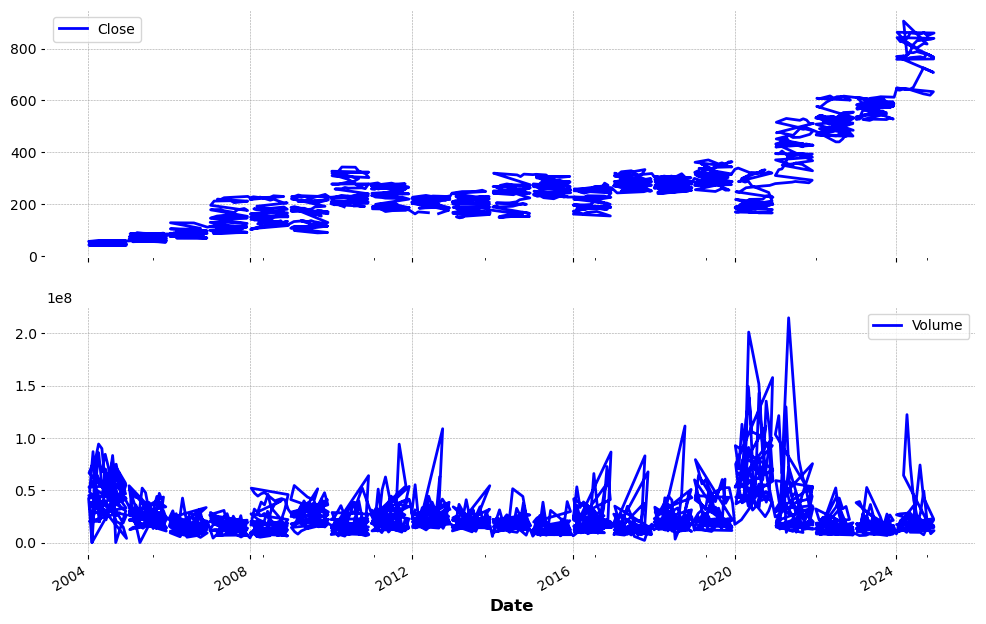

In [26]:
data[['Close', 'Volume']].plot(subplots=True, style='b',
figsize=(12, 8));

In [27]:
data['simple_rtn'] = data.Close.pct_change()
data['log_rtn'] = np.log(data.Close/data.Close.shift(1))

C:\Users\rahul\AppData\Local\Temp\ipykernel_6748\3481075938.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['simple_rtn'] = data.Close.pct_change()


array([<Axes: xlabel='Date'>], dtype=object)

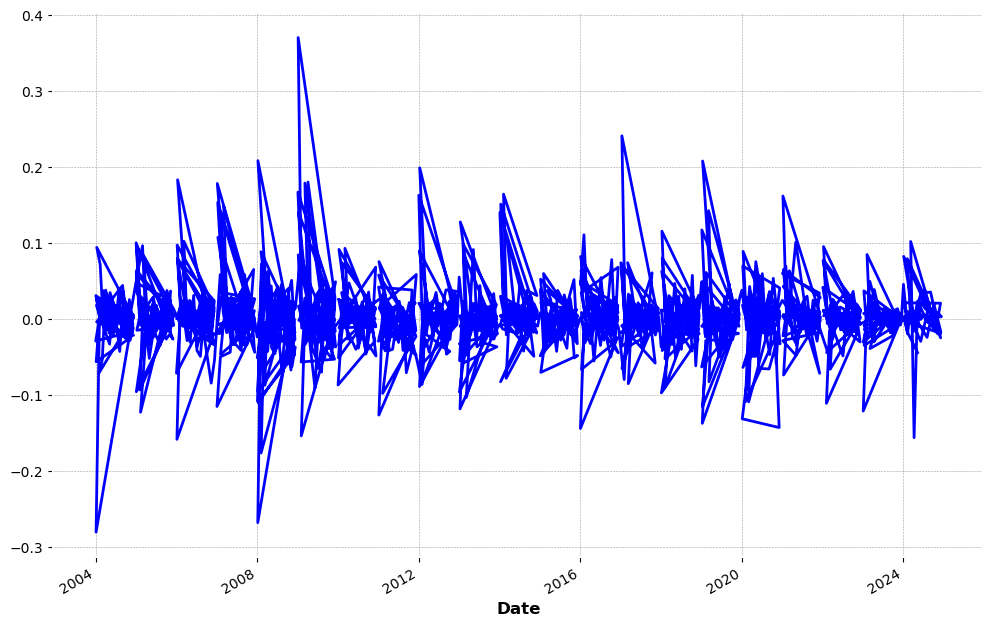

In [28]:
data['log_rtn'].plot(subplots=True, style='b',
figsize=(12, 8))

In [29]:
data['log_rtn'].tail(12)

Date
2024-02-07   -0.018944
2024-03-07    0.016566
2024-04-07   -0.000774
2024-05-07    0.024073
2024-08-07   -0.004079
2024-09-07    0.005880
2024-10-07   -0.014384
2024-11-07    0.009029
2024-12-07    0.003496
2024-01-08    0.003426
2024-02-08   -0.017305
2024-05-08   -0.043634
Name: log_rtn, dtype: float64

In [30]:
import statsmodels.api as sm
import scipy.stats as scs
r_range = np.linspace(min(data.log_rtn), max(data.log_rtn), num=1000)
mu = data.log_rtn.mean()
sigma = data.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

C:\Users\rahul\AppData\Local\Temp\ipykernel_6748\480777069.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.log_rtn, kde=False, norm_hist=True, ax=ax[0])


Text(0.5, 1.0, 'Q-Q plot')

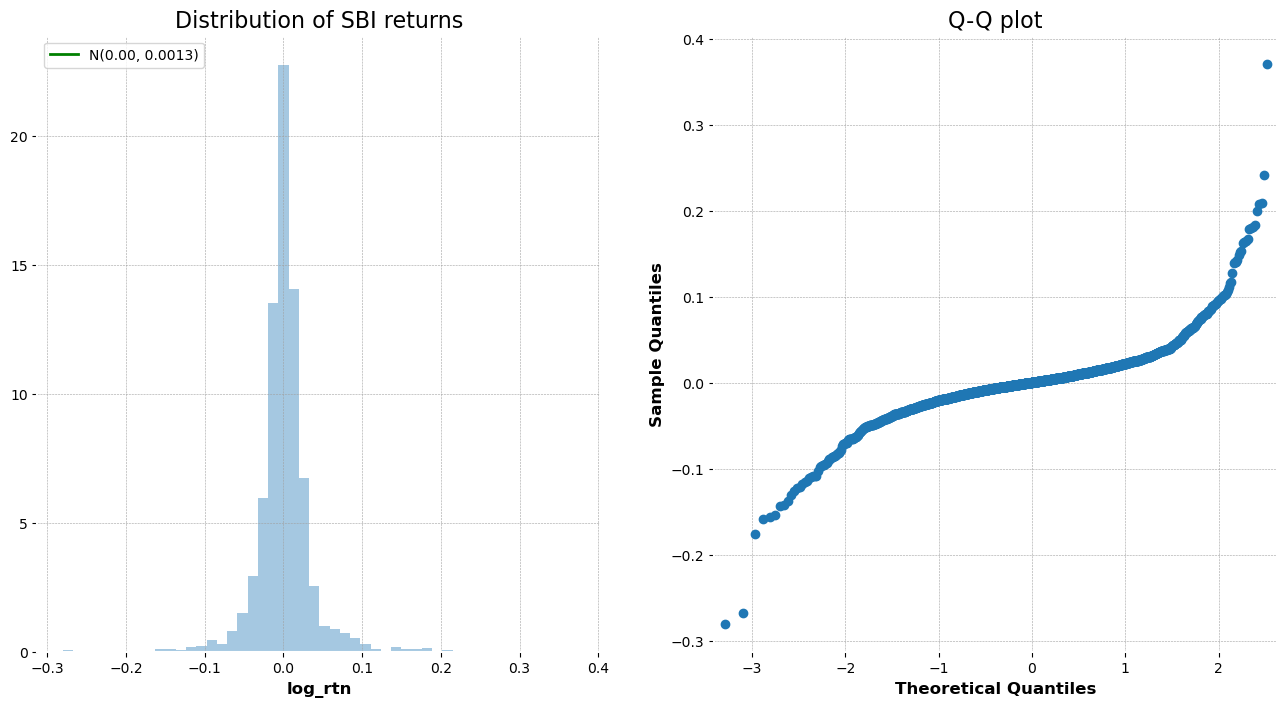

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(data.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of SBI returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(data.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

In [32]:
data['moving_std_252'] = data[['log_rtn']].rolling(window=252).std()
data['moving_std_21'] = data[['log_rtn']].rolling(window=21).std()

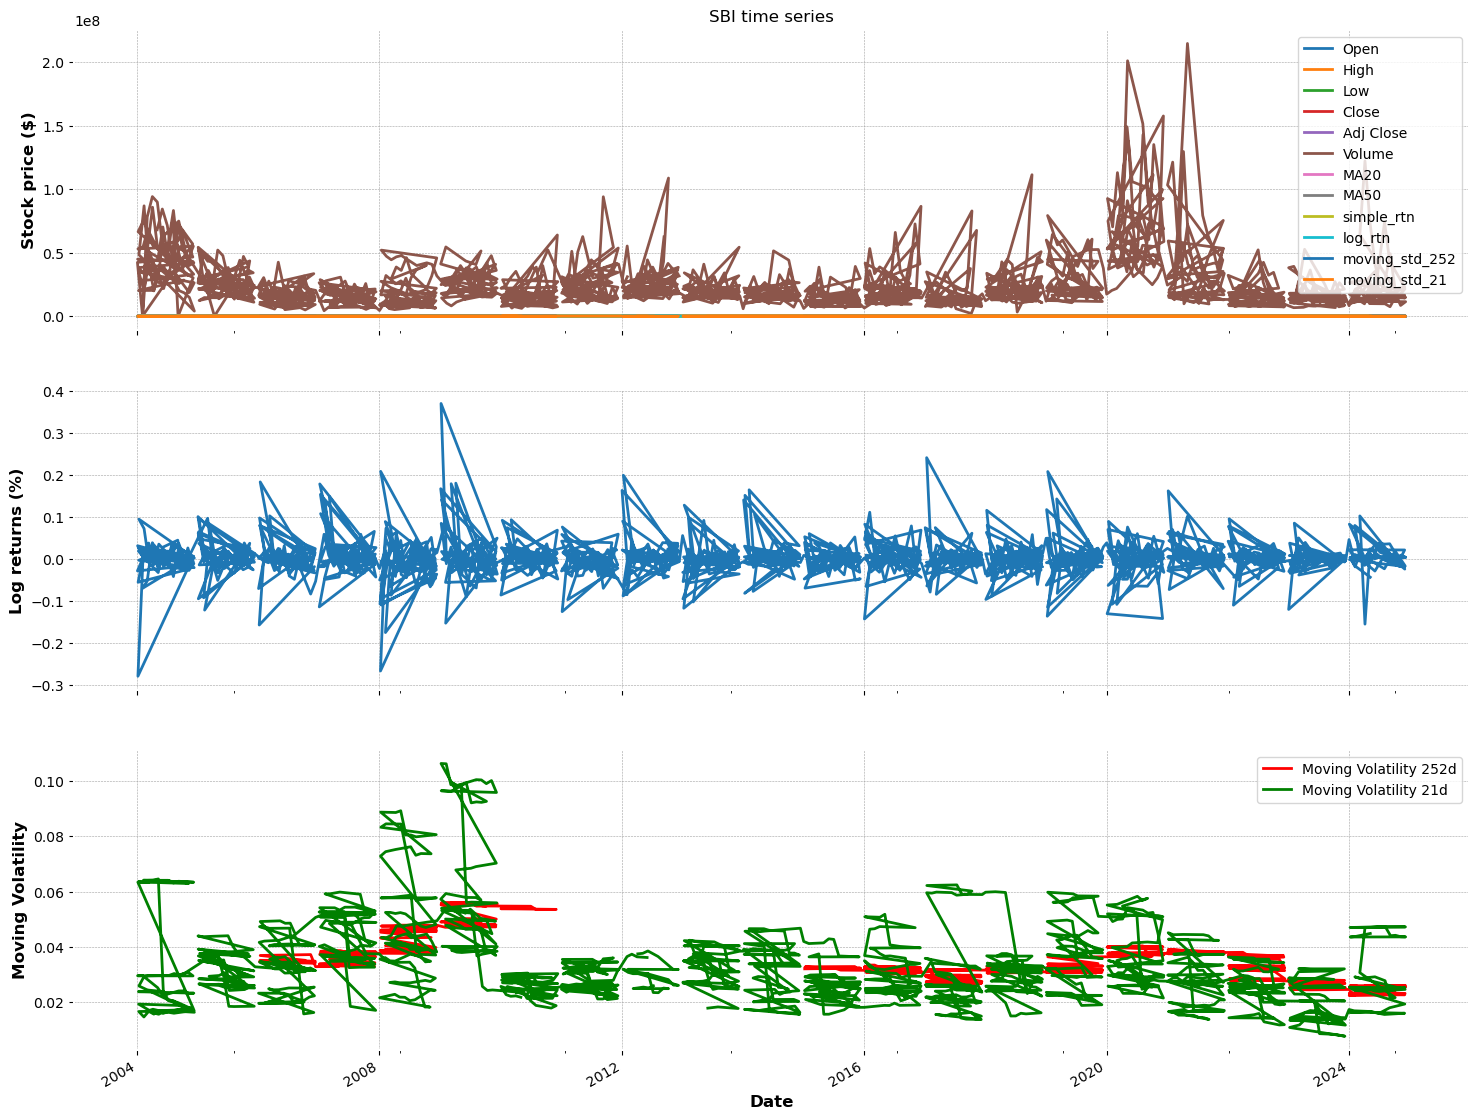

In [33]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
sharex=True)
data.plot(ax=ax[0])
ax[0].set(title='SBI time series',
ylabel='Stock price ($)')
data.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
data.moving_std_252.plot(ax=ax[2], color='r',
label='Moving Volatility 252d')
data.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()

In [34]:
# Feature Engineering
# Extract day, month, and year from the Date
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year

# Display the new columns
print("Data with Day, Month, and Year columns:")
print(data[['Day', 'Month', 'Year']].head())

Data with Day, Month, and Year columns:
            Day  Month  Year
Date                        
2004-05-01    1      5  2004
2004-06-01    1      6  2004
2004-07-01    1      7  2004
2004-08-01    1      8  2004
2004-09-01    1      9  2004


In [35]:
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Display the daily returns
print("Daily Returns:")
print(data[['Close', 'Daily_Return']].head())


Daily Returns:
                Close  Daily_Return
Date                               
2004-05-01  56.700886           NaN
2004-06-01  56.719753      0.000333
2004-07-01  56.290455     -0.007569
2004-08-01  58.569057      0.040479
2004-09-01  60.390053      0.031091


C:\Users\rahul\AppData\Local\Temp\ipykernel_6748\552165094.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['Daily_Return'] = data['Close'].pct_change()


In [36]:
# Calculate moving averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Display the moving averages
print("Data with 20-day and 50-day Moving Averages:")
print(data[['Close', 'MA20', 'MA50']].head(30))

Data with 20-day and 50-day Moving Averages:
                Close       MA20  MA50
Date                                  
2004-05-01  56.700886        NaN   NaN
2004-06-01  56.719753        NaN   NaN
2004-07-01  56.290455        NaN   NaN
2004-08-01  58.569057        NaN   NaN
2004-09-01  60.390053        NaN   NaN
2004-12-01  60.536297        NaN   NaN
2004-02-02  56.427261        NaN   NaN
2004-03-02  53.525936        NaN   NaN
2004-04-02  55.634705        NaN   NaN
2004-05-02  54.662880        NaN   NaN
2004-06-02  56.191383        NaN   NaN
2004-09-02  58.762478        NaN   NaN
2004-10-02  57.658558        NaN   NaN
2004-11-02  59.187061        NaN   NaN
2004-12-02  58.271847        NaN   NaN
2004-01-03  56.634838        NaN   NaN
2004-02-03  56.634838        NaN   NaN
2004-03-03  56.540485        NaN   NaN
2004-04-03  57.035835        NaN   NaN
2004-05-03  58.163342  57.226897   NaN
2004-08-03  59.215366  57.352621   NaN
2004-09-03  59.786198  57.505944   NaN
2004-10-03  58.2671

In [37]:
# Calculate volatility (rolling standard deviation of daily returns)
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()

# Display the volatility
print("Data with Volatility:")
print(data[['Daily_Return', 'Volatility']].head(30))

Data with Volatility:
            Daily_Return  Volatility
Date                                
2004-05-01           NaN         NaN
2004-06-01      0.000333         NaN
2004-07-01     -0.007569         NaN
2004-08-01      0.040479         NaN
2004-09-01      0.031091         NaN
2004-12-01      0.002422         NaN
2004-02-02     -0.067877         NaN
2004-03-02     -0.051417         NaN
2004-04-02      0.039397         NaN
2004-05-02     -0.017468         NaN
2004-06-02      0.027962         NaN
2004-09-02      0.045756         NaN
2004-10-02     -0.018786         NaN
2004-11-02      0.026510         NaN
2004-12-02     -0.015463         NaN
2004-01-03     -0.028093         NaN
2004-02-03      0.000000         NaN
2004-03-03     -0.001666         NaN
2004-04-03      0.008761         NaN
2004-05-03      0.019768         NaN
2004-08-03      0.018087    0.030260
2004-09-03      0.009640    0.030294
2004-10-03     -0.025408    0.030881
2004-11-03     -0.025261    0.030079
2004-12-03     -

In [38]:
# Create lag features
data['Lag_1'] = data['Close'].shift(1)
data['Lag_2'] = data['Close'].shift(2)
data['Lag_3'] = data['Close'].shift(3)

# Display the lag features
print("Data with Lag Features:")
print(data[['Close', 'Lag_1', 'Lag_2', 'Lag_3']].head())

Data with Lag Features:
                Close      Lag_1      Lag_2      Lag_3
Date                                                  
2004-05-01  56.700886        NaN        NaN        NaN
2004-06-01  56.719753  56.700886        NaN        NaN
2004-07-01  56.290455  56.719753  56.700886        NaN
2004-08-01  58.569057  56.290455  56.719753  56.700886
2004-09-01  60.390053  58.569057  56.290455  56.719753


In [39]:
# Example of encoding the day of the week (if created)
data['Day_of_Week'] = data.index.dayofweek

# One-hot encoding of the Day_of_Week column
data_encoded = pd.get_dummies(data, columns=['Day_of_Week'], drop_first=True)

# Display the encoded data
print("Data with One-Hot Encoded Day_of_Week:")
print(data_encoded.head())

Data with One-Hot Encoded Day_of_Week:
                 Open       High        Low      Close  Adj Close      Volume  \
Date                                                                            
2004-05-01  53.898628  57.016964  53.568394  56.700886  42.897266  68132760.0   
2004-06-01  56.799953  58.436962  55.865868  56.719753  42.911533  84466581.0   
2004-07-01  57.809521  57.809521  55.125206  56.290455  42.586750  71533904.0   
2004-08-01  56.799953  59.347462  56.799953  58.569057  44.310638  44911270.0   
2004-09-01  59.253109  61.423206  58.970051  60.390053  45.688313  73303987.0   

            MA20  MA50  simple_rtn   log_rtn  ...  Volatility      Lag_1  \
Date                                          ...                          
2004-05-01   NaN   NaN         NaN       NaN  ...         NaN        NaN   
2004-06-01   NaN   NaN    0.000333  0.000333  ...         NaN  56.700886   
2004-07-01   NaN   NaN   -0.007569 -0.007598  ...         NaN  56.719753   
2004-08-01   

In [40]:
# Create interaction features
data['Open_Close_Ratio'] = data['Open'] / data['Close']
data['High_Low_Range'] = data['High'] - data['Low']

# Display the interaction features
print("Data with Interaction Features:")
print(data[['Open', 'Close', 'Open_Close_Ratio', 'High_Low_Range']].head())

Data with Interaction Features:
                 Open      Close  Open_Close_Ratio  High_Low_Range
Date                                                              
2004-05-01  53.898628  56.700886          0.950578        3.448570
2004-06-01  56.799953  56.719753          1.001414        2.571094
2004-07-01  57.809521  56.290455          1.026986        2.684315
2004-08-01  56.799953  58.569057          0.969795        2.547509
2004-09-01  59.253109  60.390053          0.981173        2.453155


In [41]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close', 'Volume', 'MA20', 'MA50', 'Volatility']])

# Convert the scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=['Close', 'Volume', 'MA20', 'MA50', 'Volatility'])

# Display the scaled data
print("Min-Max Scaled Data:")
print(scaled_data_df.head())

Min-Max Scaled Data:
      Close    Volume  MA20  MA50  Volatility
0  0.019869  0.316962   NaN   NaN         NaN
1  0.019891  0.392949   NaN   NaN         NaN
2  0.019395  0.332784   NaN   NaN         NaN
3  0.022026  0.208933   NaN   NaN         NaN
4  0.024128  0.341019   NaN   NaN         NaN


In [42]:
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data[['Close', 'Volume', 'MA20', 'MA50', 'Volatility']])

# Convert the standardized data back to a DataFrame
standardized_data_df = pd.DataFrame(standardized_data, columns=['Close', 'Volume', 'MA20', 'MA50', 'Volatility'])

# Display the standardized data
print("Standardized Data:")
print(standardized_data_df.head())

Standardized Data:
      Close    Volume  MA20  MA50  Volatility
0 -1.258975  2.282308   NaN   NaN         NaN
1 -1.258858  3.137066   NaN   NaN         NaN
2 -1.261511  2.460292   NaN   NaN         NaN
3 -1.247429  1.067114   NaN   NaN         NaN
4 -1.236176  2.552921   NaN   NaN         NaN


In [43]:
# Check the correlation between features
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Select features with high correlation to the target (e.g., 'Close')
# This step is mostly manual where you choose based on correlation values

Correlation Matrix:
                      Open      High       Low     Close  Adj Close    Volume  \
Open              1.000000  0.999748  0.999452  0.999329   0.998094 -0.126269   
High              0.999748  1.000000  0.999410  0.999641   0.998357 -0.119254   
Low               0.999452  0.999410  1.000000  0.999739   0.998512 -0.134063   
Close             0.999329  0.999641  0.999739  1.000000   0.998739 -0.126406   
Adj Close         0.998094  0.998357  0.998512  0.998739   1.000000 -0.113891   
Volume           -0.126269 -0.119254 -0.134063 -0.126406  -0.113891  1.000000   
MA20              0.990416  0.990186  0.989925  0.989959   0.989615 -0.110363   
MA50              0.975187  0.974861  0.975009  0.974901   0.976056 -0.082253   
simple_rtn        0.007999  0.015683  0.018465  0.024957   0.022696  0.033302   
log_rtn           0.012063  0.019775  0.023153  0.029562   0.027292  0.026866   
moving_std_252   -0.543696 -0.542242 -0.546113 -0.544101  -0.560393  0.186632   
moving_s

Feature: Open, Importance: 0.05247419430101481
Feature: High, Importance: 0.1391487074573388
Feature: Low, Importance: 0.27879635588208046
Feature: Adj Close, Importance: 0.3378622488069758
Feature: Volume, Importance: 1.2741967704475492e-05
Feature: MA20, Importance: 0.02055750678402787
Feature: MA50, Importance: 0.1280298003520404
Feature: simple_rtn, Importance: 2.3973624292763077e-05
Feature: log_rtn, Importance: 1.4369061436766157e-05
Feature: moving_std_252, Importance: 6.92120025840179e-05
Feature: moving_std_21, Importance: 8.144965937533236e-05
Feature: Day, Importance: 0.0001419729295313284
Feature: Month, Importance: 7.279412069001552e-06
Feature: Year, Importance: 5.3290154656961076e-06
Feature: Daily_Return, Importance: 1.628831010538582e-05
Feature: Volatility, Importance: 5.899135647335353e-05
Feature: Lag_1, Importance: 0.02622704103651746
Feature: Lag_2, Importance: 0.005615777429050535
Feature: Lag_3, Importance: 0.010792201819271255
Feature: Day_of_Week, Importance: 

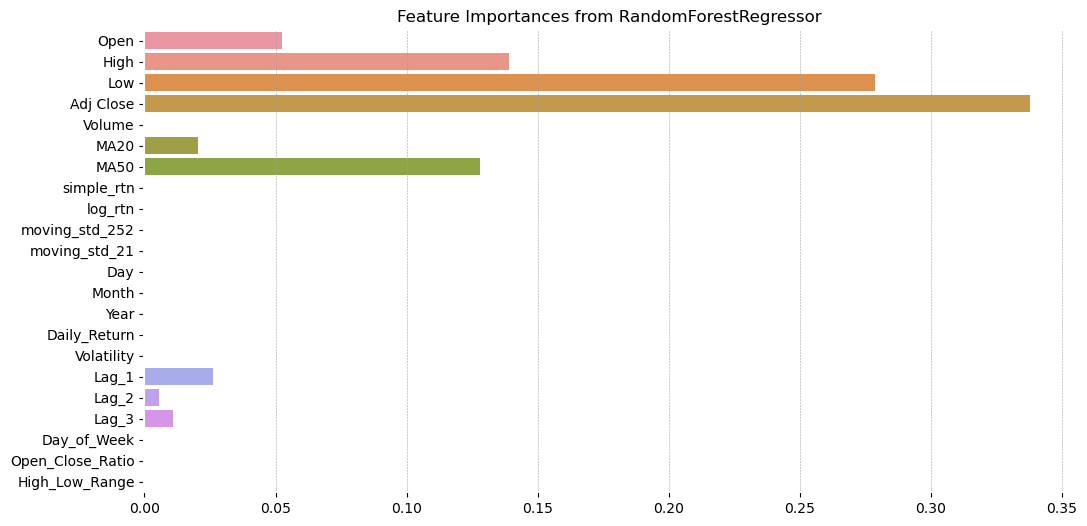

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the data (example using Close price prediction)
X = data.drop(columns=['Close'])
y = data['Close']

# Drop rows with NaN values that might have been introduced by shifting or rolling operations
X = X.dropna()
y = y[X.index]

# Train a random forest model
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Display feature importances
for name, importance in zip(feature_names, importances):
    print(f"Feature: {name}, Importance: {importance}")

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances from RandomForestRegressor")
plt.show()

In [45]:
# Model Building
# ARIMA Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the data
file_path = 'C:\\Users\\rahul\\OneDrive\\Desktop\\SBIN.NS (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())
print(data.columns)

         Date       Open       High        Low      Close  Adj Close  \
0  2004-01-05  53.898628  57.016964  53.568394  56.700886  42.897266   
1  2004-01-06  56.799953  58.436962  55.865868  56.719753  42.911533   
2  2004-01-07  57.809521  57.809521  55.125206  56.290455  42.586750   
3  2004-01-08  56.799953  59.347462  56.799953  58.569057  44.310638   
4  2004-01-09  59.253109  61.423206  58.970051  60.390053  45.688313   

       Volume  
0  68132760.0  
1  84466581.0  
2  71533904.0  
3  44911270.0  
4  73303987.0  
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


C:\Users\rahul\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


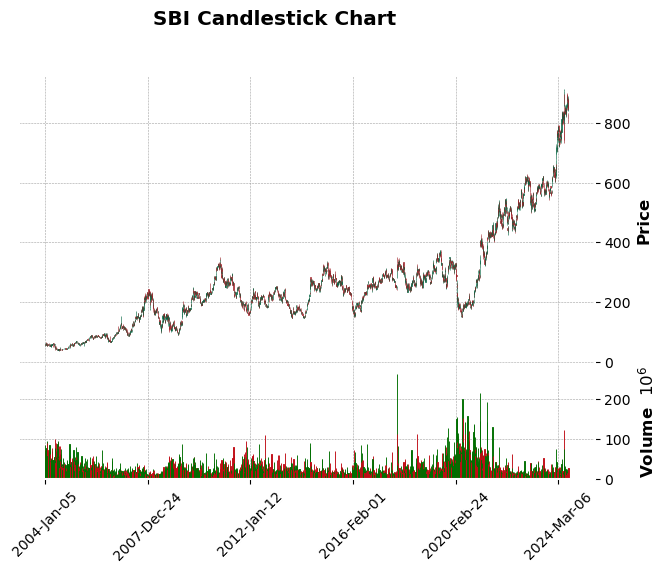

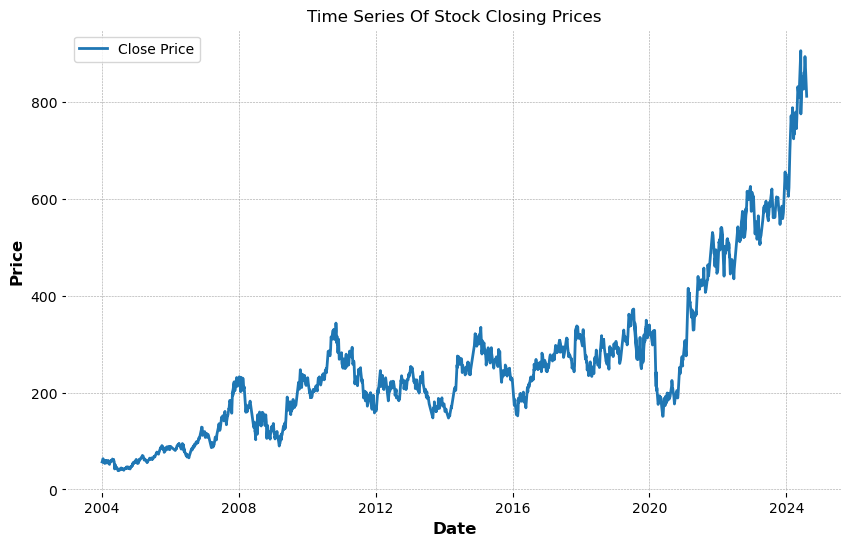

In [47]:
import pandas as pd
import mplfinance as mpf

# Assuming your data is already loaded in a DataFrame called 'data'

# Convert the 'Date' column to datetime format with the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Plot the candlestick chart
mpf.plot(data, type='candle', style='charles', title='SBI Candlestick Chart', ylabel='Price', volume=True)


plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Time Series Of Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [53]:
# Check for any NaN values in the entire DataFrame
print(data.isna().sum())

# Specifically check the 'Close' column
print(data['Close'].isna().sum())

# Option 1: Drop rows with NaNs in the 'Close' column
data.dropna(subset=['Close'], inplace=True)

# Option 2: Fill NaNs in the 'Close' column
# Fill with the previous value (forward fill)
data['Close'].fillna(method='ffill', inplace=True)

# Alternatively, fill with the next value (backward fill)
data['Close'].fillna(method='bfill', inplace=True)

# Check for infinite values in the 'Close' column
print((~np.isfinite(data['Close'])).sum())

# Optionally, replace infinite values with NaNs
data['Close'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Then, drop or fill the NaNs as shown earlier
data.dropna(subset=['Close'], inplace=True)
# or
data['Close'].fillna(method='ffill', inplace=True)

from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])



Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64
9
0


C:\Users\rahul\AppData\Local\Temp\ipykernel_6748\2373183351.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Close'].fillna(method='ffill', inplace=True)
C:\Users\rahul\AppData\Local\Temp\ipykernel_6748\2373183351.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'].fillna(method='ffill', inplace=True)
C:\Users\rahul\AppData\Local\Temp\ipykernel_6748\2373183351.py:15: FutureWarning: A value is trying to be set on a 

ADF Statistic: 0.9039497729030062
p-value: 0.9931416560444218


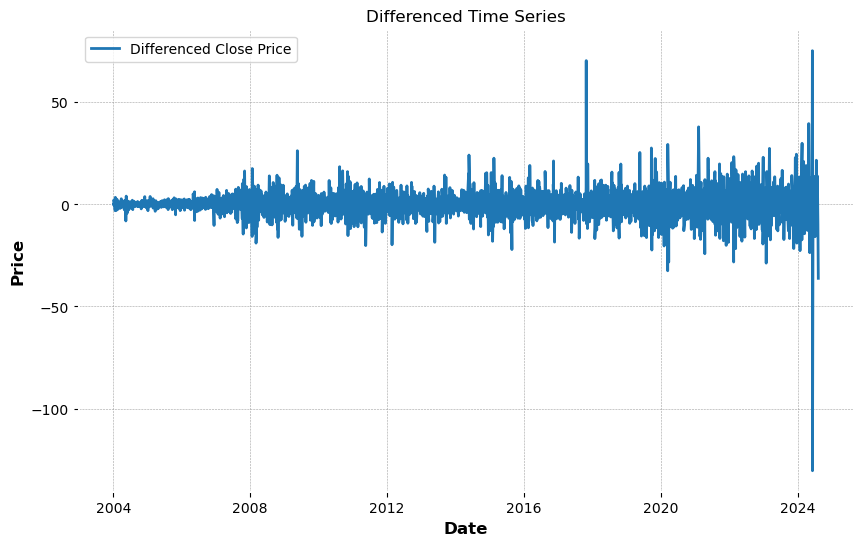

In [54]:
# Differencing the data
data_diff = data['Close'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Close Price')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

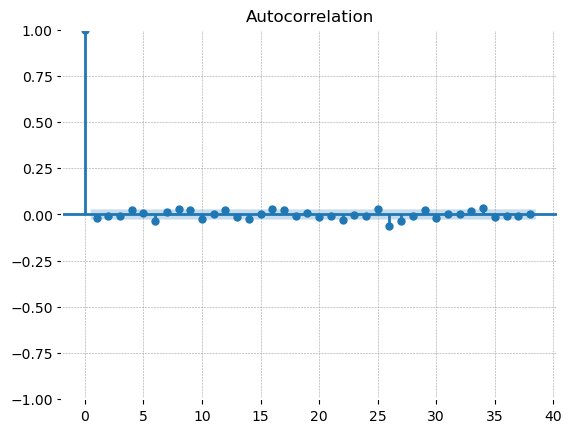

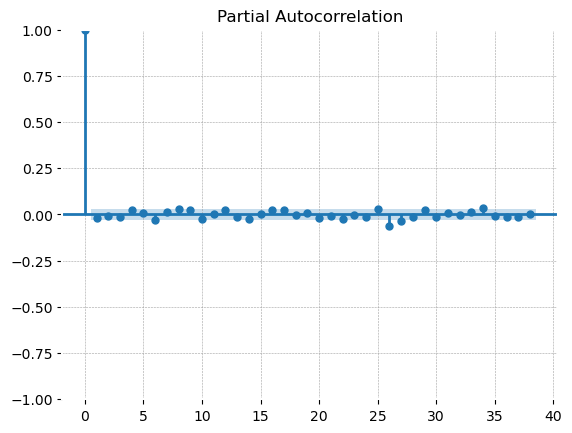

C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5091
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16384.151
Date:                Thu, 22 Aug 2024   AIC                          32774.302
Time:                        11:24:54   BIC                          32793.907
Sample:                             0   HQIC                         32781.167
                               - 5091                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3236      0.414      0.782      0.434      -0.487       1.134
ma.L1         -0.3416      0.412     -0.829      0.407      -1.150       0.466
sigma2        36.5914      0.216    169.719      0.0

In [55]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Differencing the data to make it stationary
data_diff = data['Close'].diff().dropna()

# Plot ACF and PACF to determine p and q
plot_acf(data_diff)
plot_pacf(data_diff)
plt.show()

# Define p, d, q based on analysis (example values)
p = 1
d = 1
q = 1

# Build and fit the ARIMA model
model = ARIMA(data['Close'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

In [56]:
# Forecast future values
forecast = model_fit.forecast(steps=10)  # Forecast the next 10 days
print(forecast)

5091    812.413104
5092    812.660050
5093    812.739966
5094    812.765828
5095    812.774198
5096    812.776906
5097    812.777783
5098    812.778066
5099    812.778158
5100    812.778188
Name: predicted_mean, dtype: float64


C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


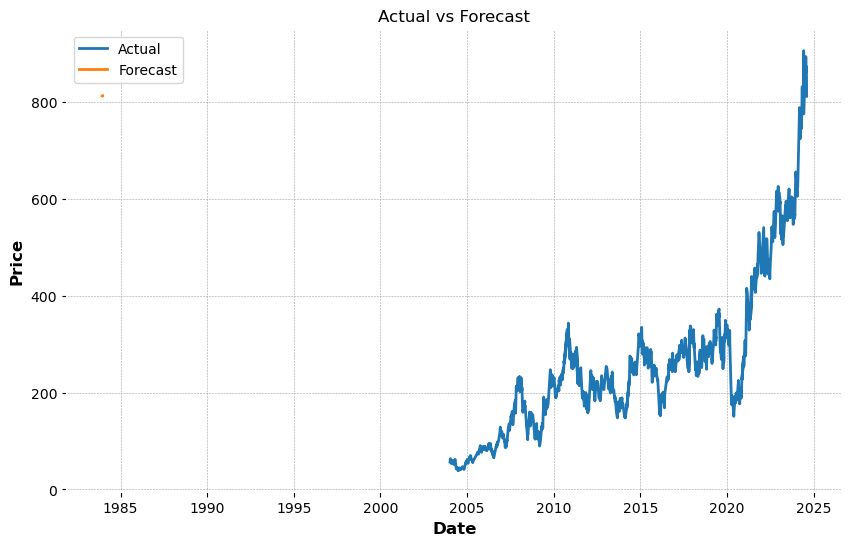

In [57]:
# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.title('Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
# Tuning Hyperparameters for ARIMA Models
import pmdarima as pm

# Auto ARIMA model for selecting p, d, q
model = pm.auto_arima(data['Close'], start_p=1, start_q=1, max_p=5, max_q=5, seasonal=False, trace=True)

# Fit the model
model.fit(data['Close'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32773.056, Time=3.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32771.077, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32771.491, Time=0.59 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32771.460, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32772.137, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 5.647 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

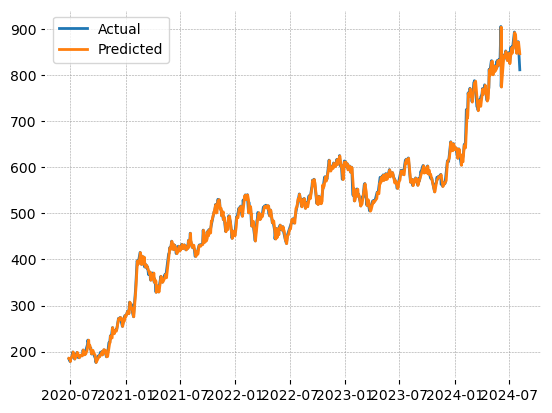

In [59]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for regression (using lagged values)
data['Lag1'] = data['Close'].shift(1)
data.dropna(inplace=True)

# Split the data into training and testing sets
X = data[['Lag1']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.legend()
plt.show()


In [60]:
# Cross-Validation for Time Series Models
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

tscv = TimeSeriesSplit(n_splits=5)
model = LinearRegression()

mse_values = []
rmse_values = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Reshape if necessary
    X_train = X_train.values.reshape(X_train.shape[0], -1)
    X_test = X_test.values.reshape(X_test.shape[0], -1)
    
    # Ensure y is 1D
    y_train = y_train.ravel()
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    mse_values.append(mse)
    rmse_values.append(rmse)
    
    print(f'MSE: {mse}, RMSE: {rmse}')

print(f'Average MSE: {np.mean(mse_values)}')
print(f'Average RMSE: {np.mean(rmse_values)}')

MSE: 22.81792933298621, RMSE: 4.776811628375794
MSE: 19.969094287457363, RMSE: 4.468679255379308
MSE: 24.34868406622926, RMSE: 4.93443857659909
MSE: 48.701866669131135, RMSE: 6.978672271222595
MSE: 101.63865356875897, RMSE: 10.081599752457889
Average MSE: 43.49524558491259
Average RMSE: 6.248040296806936


C:\Users\rahul\AppData\Local\Temp\ipykernel_6748\1746662068.py:23: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()
C:\Users\rahul\AppData\Local\Temp\ipykernel_6748\1746662068.py:23: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()
C:\Users\rahul\AppData\Local\Temp\ipykernel_6748\1746662068.py:23: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()
C:\Users\rahul\AppData\Local\Temp\ipykernel_6748\1746662068.py:23: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy arr

Mean Squared Error: 44311.424494545594


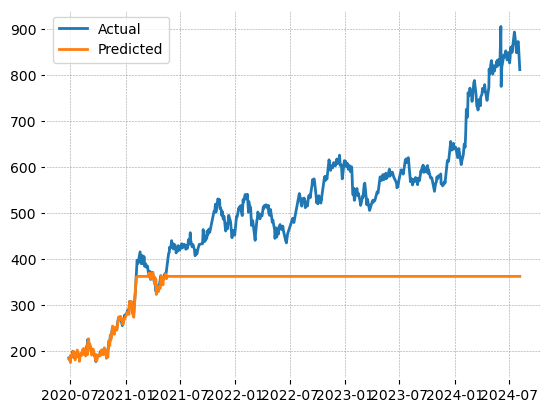

In [61]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.legend()
plt.show()

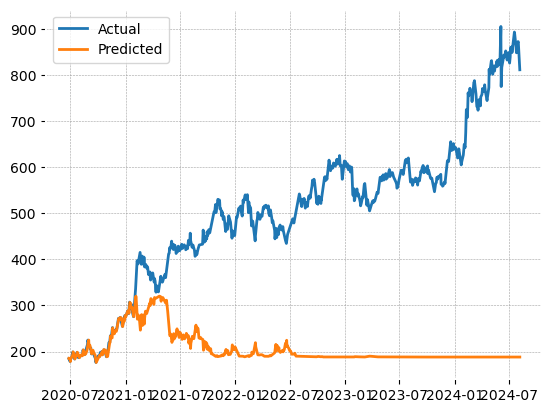

In [62]:
# Support Vector Machines (SVM)
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scaling the data for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Build the SVM model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.legend()
plt.show()

C:\Users\rahul\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0069
Epoch 2/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 2.9078e-04
Epoch 3/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 2.7237e-04
Epoch 4/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 2.3715e-04
Epoch 5/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 2.0642e-04
Epoch 6/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 1.9184e-04
Epoch 7/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 1.8037e-04
Epoch 8/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 1.7451e-04
Epoch 9/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 1.6836e-04
Epoch 10/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 1.4352e-04
Epoch 11/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 1.4231e-04
Epoch 12/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 1.6563e-04
Epoch 13/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 1.4753e-04
Epoch 14/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 

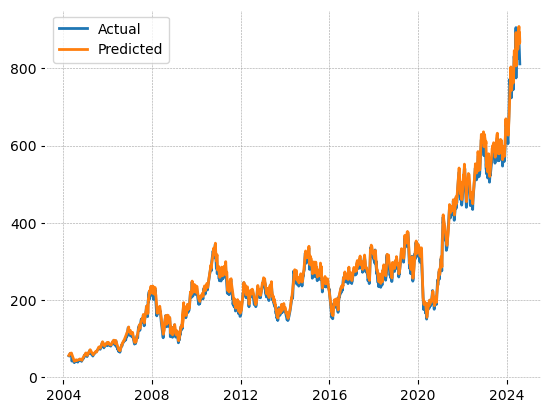

In [63]:
# LSTM (Long Short-Term Memory)
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

# Create the training data (X_train, y_train)
X_train = []
y_train = []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict and visualize
predicted_prices = model.predict(X_train)
predicted_prices = scaler.inverse_transform(predicted_prices)

plt.plot(data.index[60:], data['Close'][60:], label='Actual')
plt.plot(data.index[60:], predicted_prices, label='Predicted')
plt.legend()
plt.show()

In [65]:
!pip install TextBlob

  Obtaining dependency information for TextBlob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 495.5 kB/s eta 0:00:02
   ----------------- ---------------------- 276.5/626.3 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.6 MB/s eta 0:00:00


In [66]:
# Sentiment Analysis (Natural Language Processing)
from textblob import TextBlob

# Example data: Assume we have a column of news headlines related to stocks
# For demonstration purposes only (replace with actual data)
news_data = pd.DataFrame({
    'Date': pd.to_datetime(['2024-08-10', '2024-08-11', '2024-08-12']),
    'Headline': ['Stock market surges amid economic optimism',
                 'Tech stocks tumble after earnings reports',
                 'Federal Reserve hints at interest rate hikes']
})

# Analyze sentiment
news_data['Sentiment'] = news_data['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(news_data)


        Date                                      Headline  Sentiment
0 2024-08-10    Stock market surges amid economic optimism        0.2
1 2024-08-11     Tech stocks tumble after earnings reports        0.0
2 2024-08-12  Federal Reserve hints at interest rate hikes        0.0


In [75]:
# Prophet requires the data to have two specific columns: 'ds' for the date and 'y' for the target variable
# Example for ISO format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Example for day-first format
# data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', dayfirst=True)

# Example for US format
# data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
# Drop rows where 'Date' could not be parsed
data.dropna(subset=['Date'], inplace=True)

import pandas as pd

# Load data
data = pd.read_csv("C:\\Users\\rahul\\OneDrive\\Desktop\\SBIN.NS (1).csv")

# Inspect the first few rows of the 'Date' column
print(data['Date'].head())

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d', errors='coerce')

# Drop rows with invalid dates
data.dropna(subset=['Date'], inplace=True)

# Verify the conversion
print(data['Date'].head())


0    2004-01-05
1    2004-01-06
2    2004-01-07
3    2004-01-08
4    2004-01-09
Name: Date, dtype: object
0   2004-01-05
1   2004-01-06
2   2004-01-07
3   2004-01-08
4   2004-01-09
Name: Date, dtype: datetime64[ns]


11:41:13 - cmdstanpy - INFO - Chain [1] start processing
11:41:15 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\rahul\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\rahul\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


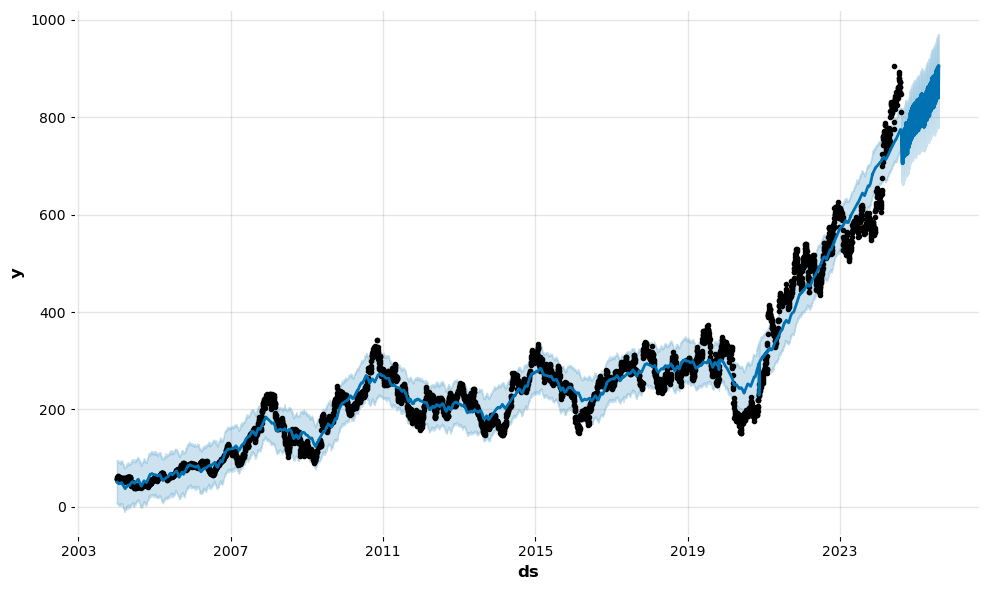

In [81]:
import pandas as pd
from prophet import Prophet

# Load data
data = pd.read_csv("C:\\Users\\rahul\\OneDrive\\Desktop\\SBIN.NS (1).csv")

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with invalid dates
data.dropna(subset=['Date'], inplace=True)

# Prepare the DataFrame for Prophet
df = data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Adjust periods as needed
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)


In [82]:
# Create a DataFrame to hold future dates (e.g., next 365 days)
future = model.make_future_dataframe(periods=365)

# Display the future DataFrame
future.tail()

,ds
5451,2025-08-01
5452,2025-08-02
5453,2025-08-03
5454,2025-08-04
5455,2025-08-05


In [83]:
# Make predictions
forecast = model.predict(future)

# Display the forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5451,2025-08-01,905.369128,835.809442,970.413144
5452,2025-08-02,839.671378,773.240106,901.900344
5453,2025-08-03,887.704226,823.630595,954.411361
5454,2025-08-04,905.552441,834.812510,966.590132
5455,2025-08-05,905.549801,836.849348,968.239748


C:\Users\rahul\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\rahul\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\rahul\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

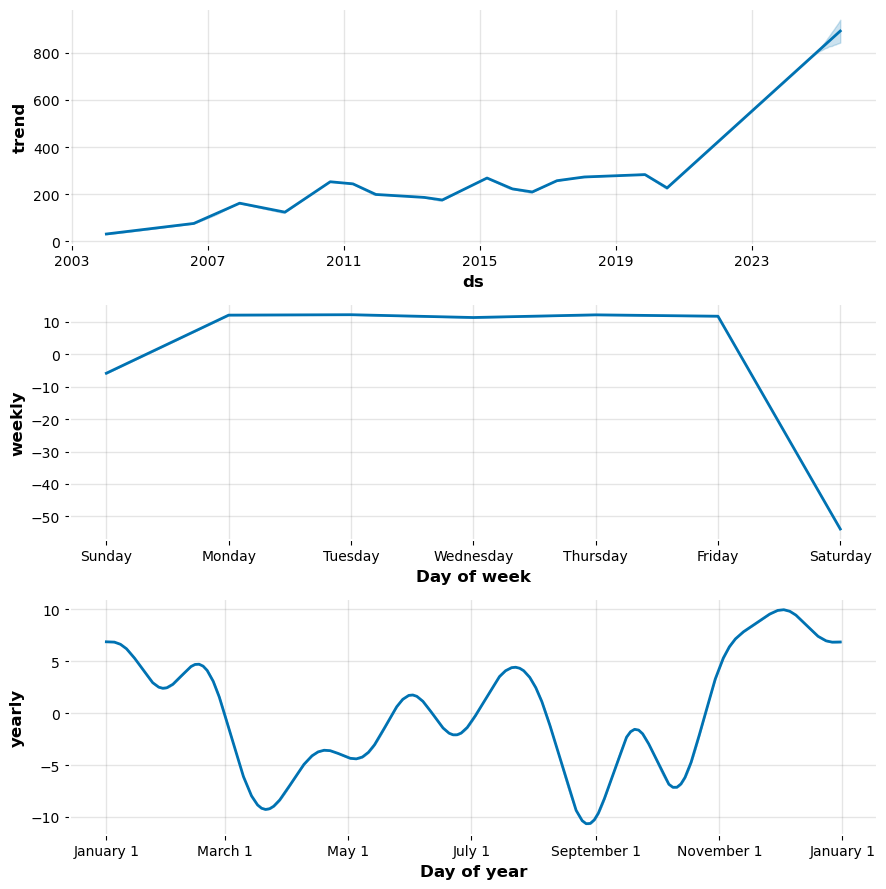

In [85]:
# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

In [86]:
# Assuming df contains the original data and forecast contains the Prophet forecast
merged_df = pd.merge(df, forecast[['ds', 'yhat']], on='ds', how='left')

In [87]:
# Check for NaN values in the merged dataframe
print(merged_df.isna().sum())

# Display rows with NaN values
print(merged_df[merged_df.isna().any(axis=1)])

ds      0
y       9
yhat    9
dtype: int64
             ds   y  yhat
80   2004-04-26 NaN   NaN
202  2004-10-13 NaN   NaN
1518 2010-02-06 NaN   NaN
1996 2012-01-07 NaN   NaN
2035 2012-03-03 NaN   NaN
2165 2012-09-08 NaN   NaN
2207 2012-11-11 NaN   NaN
2544 2014-03-22 NaN   NaN
2773 2015-02-28 NaN   NaN


In [88]:
# Remove rows with NaN values
merged_df = merged_df.dropna()

In [89]:
merged_df.head()

,ds,y,yhat
0,2004-01-05,56.700886,50.359830
1,2004-01-06,56.719753,50.496973
2,2004-01-07,56.290455,49.622379
3,2004-01-08,58.569057,50.413479
4,2004-01-09,60.390053,49.933464


In [90]:
from sklearn.metrics import mean_squared_error

# Calculate MSE between actual and predicted values
mse_prophet = mean_squared_error(merged_df['y'], merged_df['yhat'])
print(f"Prophet Model Mean Squared Error: {mse_prophet}")

Prophet Model Mean Squared Error: 1172.3120227541524
